# Fillna = 0

todo:
- Adjust pipeline to support multilabel.
- save plots during train
- add depth param

In [1]:
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler
from typing import List
import json
import random

import os
os.chdir('/home/david/Desktop/projects/thesis/downstream_classification/')
data_folder = './data/mit-bih/processed/'

# import
from executors.MIT_BIH_train_on_local_machine_v2 import trainer

# get splits
with open(data_folder+"splits.json") as json_file:
    splits = json.load(json_file)

/home/david/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# from dataloader.MIT_BIH_DataGenerator import MIT_BIH_DataGen
# temp = MIT_BIH_DataGen(data_path=data_folder, readings=splits['train'], batch_size=500)
# X,y = temp.__getitem__(222)

# print('Shapes:', X.shape, y.shape)
# print('y:', y)

Starting Experiment
train_N_files[:5]: ['08219_interval_30_labeled_N.npy', '04936_interval_46_labeled_N.npy', '04043_interval_130_labeled_N.npy', '04043_interval_90_labeled_N.npy', '06426_interval_43_labeled_N.npy']
train_AF_files[:5]: ['08219_interval_31_labeled_AFIB.npy', '04043_interval_117_labeled_AFIB.npy', '04043_interval_9_labeled_AFIB.npy', '05121_interval_7_labeled_AFIB.npy', '04043_interval_115_labeled_AFIB.npy']
train_N_files Len: 255
train_AF_files Len: 260
train_N_files[:5]: ['05261_interval_2_labeled_N.npy', '04048_interval_12_labeled_N.npy', '05261_interval_10_labeled_N.npy', '05261_interval_22_labeled_N.npy', '06453_interval_6_labeled_N.npy']
train_AF_files[:5]: ['04048_interval_1_labeled_AFIB.npy', '04746_interval_7_labeled_AFIB.npy', '05261_interval_15_labeled_AFIB.npy', '05261_interval_5_labeled_AFIB.npy', '06453_interval_9_labeled_AFIB.npy']
train_N_files Len: 33
train_AF_files Len: 29


Within epoch loss (validation) 0.35306: 100%|██████████| 100/100 [00:14<00:00,  7.02it/s]


(0.9552297914095262, 0)

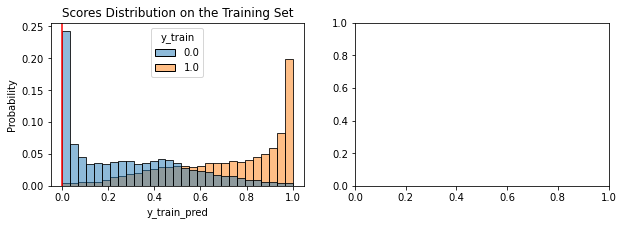

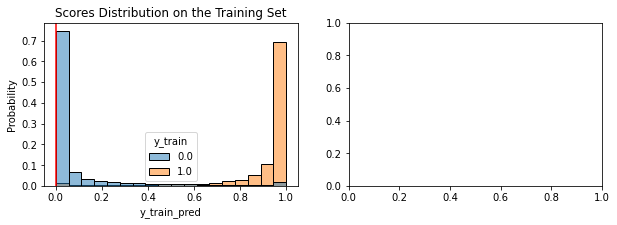

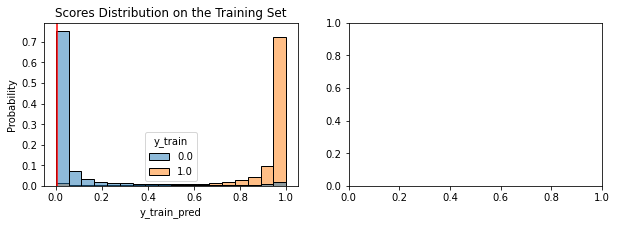

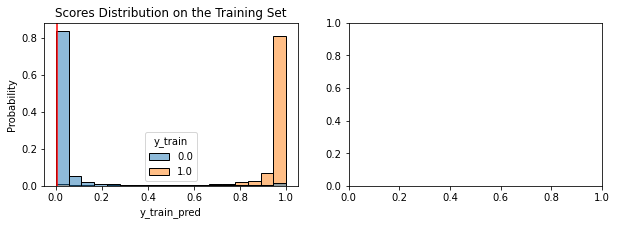

In [2]:
config = {
    
    # general
    'seed': 123,
    'splits':splits,
    'data_path':data_folder,
    'training_steps':100,
    'testing_steps':100,
    'num_inputs':2,

    # training
    'batch_size': 400,
    'n_epochs': 10,
    'weight_decay': 0.7,
    'lr': 0.0005,
    'eval_metric':'rocauc',

    # architecture
    'targets': ['one_year_until_death'],
    'dropout': 0.1,
    'clip': 1,
    'scale':1,
    'depth': 1,
    
    # misc
    'model_saving_path': './models/MIT_BIH_inception-v0-death-d1',
    'verbosity':True
}

# run
print('Starting Experiment')
trainer(**config)

In [ ]:
import sys
sys.exit(0)